<a href="https://colab.research.google.com/github/agokmenefe/Data-Science/blob/main/DL/Projects/CNN_Project_Image_Classification_with_CNN_(catdogclassifier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>

<h1 style="text-align: center;">Deep Learning<br><br>Image Classification with CNN<br><br>Cat-Dog Classification Project<br><h1>

# Dataset Info

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set incgludes 6897 cat and dogs images together. 

# Import Libraries and Export Images from Zip_File

In [71]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [72]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
import zipfile

# Unzip the file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/cat_dog_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

# Recognizing and Understanding Data

In [75]:
my_data_dir = "data"

In [76]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir) 

['validation', 'test', 'train']

In [77]:
validation_path = my_data_dir + '/validation/'
train_path = my_data_dir + '/train/'

In [78]:
os.listdir(validation_path)

['dog', 'cat']

In [79]:
os.listdir(train_path)

['dog', 'cat']

In [80]:
classes = os.listdir(train_path)
classes

['dog', 'cat']

In [81]:
import pathlib

data_dir = pathlib.Path(train_path) # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['cat' 'dog']


In [82]:
class_names

array(['cat', 'dog'], dtype='<U3')

**Let's check how many images there are.**

In [83]:
os.listdir(train_path+'cat')

['cat.9560.jpg',
 'cat.10959.jpg',
 'cat.2282.jpg',
 'cat.560.jpg',
 'cat.4056.jpg',
 'cat.931.jpg',
 'cat.6286.jpg',
 'cat.3424.jpg',
 'cat.3004.jpg',
 'cat.2751.jpg',
 'cat.4085.jpg',
 'cat.7323.jpg',
 'cat.8753.jpg',
 'cat.7022.jpg',
 'cat.5908.jpg',
 'cat.10917.jpg',
 'cat.8775.jpg',
 'cat.9438.jpg',
 'cat.658.jpg',
 'cat.5708.jpg',
 'cat.8801.jpg',
 'cat.4953.jpg',
 'cat.4676.jpg',
 'cat.12297.jpg',
 'cat.6441.jpg',
 'cat.761.jpg',
 'cat.2900.jpg',
 'cat.10328.jpg',
 'cat.12057.jpg',
 'cat.3514.jpg',
 'cat.10909.jpg',
 'cat.9777.jpg',
 'cat.9587.jpg',
 'cat.4904.jpg',
 'cat.9973.jpg',
 'cat.2570.jpg',
 'cat.7905.jpg',
 'cat.2780.jpg',
 'cat.7432.jpg',
 'cat.3161.jpg',
 'cat.7891.jpg',
 'cat.2491.jpg',
 'cat.3892.jpg',
 'cat.10440.jpg',
 'cat.10843.jpg',
 'cat.5229.jpg',
 'cat.11746.jpg',
 'cat.6958.jpg',
 'cat.783.jpg',
 'cat.683.jpg',
 'cat.8614.jpg',
 'cat.6082.jpg',
 'cat.9011.jpg',
 'cat.8213.jpg',
 'cat.11332.jpg',
 'cat.98.jpg',
 'cat.4303.jpg',
 'cat.229.jpg',
 'cat.6646.jp

In [84]:
len(os.listdir(train_path+'cat')), len(os.listdir(train_path+'dog'))   #There is an imbalance between classes

(12500, 5026)

In [85]:
len(os.listdir(validation_path+'cat')), len(os.listdir(validation_path+'dog'))

(1219, 1071)

In [86]:
# Walk through cell_images directory and list number of files
for dirpath, dirnames, filenames in os.walk(my_data_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in 'data'.
There are 2 directories and 0 images in 'data/validation'.
There are 0 directories and 1071 images in 'data/validation/dog'.
There are 0 directories and 1219 images in 'data/validation/cat'.
There are 0 directories and 6897 images in 'data/test'.
There are 2 directories and 0 images in 'data/train'.
There are 0 directories and 5026 images in 'data/train/dog'.
There are 0 directories and 12500 images in 'data/train/cat'.


**Let's take an example images from both train-cat and train-dog folders to observe process** 

In [87]:
os.listdir(train_path+'cat')[:10]

['cat.9560.jpg',
 'cat.10959.jpg',
 'cat.2282.jpg',
 'cat.560.jpg',
 'cat.4056.jpg',
 'cat.931.jpg',
 'cat.6286.jpg',
 'cat.3424.jpg',
 'cat.3004.jpg',
 'cat.2751.jpg']

In [88]:
os.listdir(train_path+'cat')[5]

'cat.931.jpg'

In [89]:
cat_path = train_path+'cat'+'/cat.931.jpg'

In [90]:
cat_path

'data/train/cat/cat.931.jpg'

In [91]:
imread(cat_path)

array([[[186, 199, 205],
        [186, 199, 205],
        [185, 198, 204],
        ...,
        [129, 123, 127],
        [143, 137, 139],
        [143, 137, 139]],

       [[186, 199, 205],
        [186, 199, 205],
        [185, 198, 204],
        ...,
        [123, 117, 121],
        [136, 130, 132],
        [136, 130, 132]],

       [[186, 199, 205],
        [186, 199, 205],
        [185, 198, 204],
        ...,
        [128, 122, 126],
        [124, 120, 121],
        [124, 120, 121]],

       ...,

       [[166, 123,  89],
        [168, 125,  91],
        [169, 126,  92],
        ...,
        [172, 137, 107],
        [167, 134, 103],
        [167, 134, 103]],

       [[166, 123,  89],
        [168, 125,  91],
        [170, 127,  93],
        ...,
        [172, 137, 107],
        [167, 134, 103],
        [167, 134, 103]],

       [[166, 123,  89],
        [168, 125,  91],
        [170, 127,  93],
        ...,
        [172, 137, 107],
        [167, 134, 103],
        [167, 134, 103]]

In [92]:
cats= imread(cat_path)

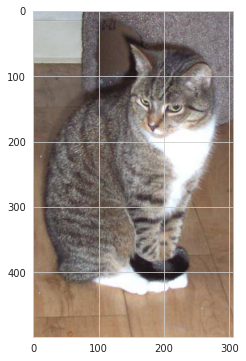

In [93]:
plt.imshow(cats);

In [94]:
cats.shape

(499, 306, 3)

In [95]:
os.listdir(train_path+'dog')[:10]

['dog.11695.jpg',
 'dog.10848.jpg',
 'dog.12336.jpg',
 'dog.12349.jpg',
 'dog.10031.jpg',
 'dog.2818.jpg',
 'dog.12097.jpg',
 'dog.1430.jpg',
 'dog.12124.jpg',
 'dog.2272.jpg']

In [96]:
dog_path = train_path+'dog/'+os.listdir(train_path+'dog')[5]

In [97]:
imread(dog_path)

array([[[127,  57,   5],
        [143,  74,  19],
        [159,  88,  32],
        ...,
        [168, 155, 103],
        [168, 155, 103],
        [168, 155, 103]],

       [[141,  74,  21],
        [150,  83,  28],
        [158,  91,  36],
        ...,
        [168, 154, 105],
        [168, 154, 105],
        [168, 154, 105]],

       [[149,  86,  32],
        [152,  89,  35],
        [155,  92,  38],
        ...,
        [170, 153, 109],
        [170, 153, 109],
        [170, 153, 109]],

       ...,

       [[ 88,  65,  57],
        [ 95,  72,  64],
        [ 98,  78,  67],
        ...,
        [187, 178, 163],
        [188, 179, 164],
        [189, 180, 165]],

       [[ 87,  64,  58],
        [ 95,  72,  64],
        [100,  77,  69],
        ...,
        [185, 176, 161],
        [186, 177, 162],
        [188, 179, 164]],

       [[ 88,  63,  59],
        [ 96,  73,  67],
        [101,  78,  70],
        ...,
        [183, 174, 159],
        [184, 175, 160],
        [186, 177, 162]]

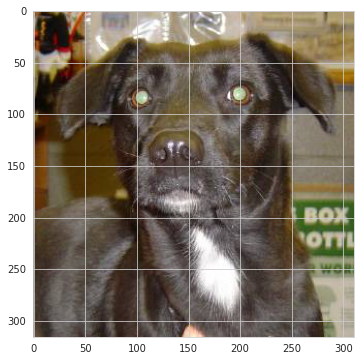

In [98]:
dogs = imread(dog_path)
plt.imshow(dogs);

In [99]:
dogs.shape

(316, 311, 3)

In [100]:
# View a random image
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (500, 274, 3)


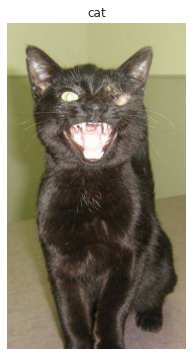

In [101]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_path,
                        target_class="cat")

Image shape: (375, 499, 3)


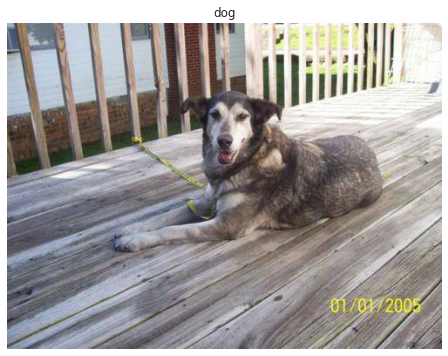

In [102]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_path,
                        target_class="dog")

Image shape: (406, 363, 3)


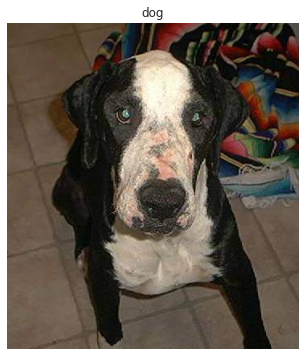

In [103]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_path,
                        target_class=random.choice(class_names)) # get a random class name

# Data Preprocessing

## Defining Input Shape

**Let's decide on the final dimension of these images.**

In [104]:
cats.shape

(499, 306, 3)

In [105]:
dogs.shape

(316, 311, 3)

x = []
y = []

for image in os.listdir(train_path+'uninfected'):
    img = imread(train_path+'uninfected/'+image)
    d1,d2,_ = img.shape
    x.append(d1)
    y.append(d2)

In [106]:
x = [imread(train_path+'dog/'+image).shape[0] for image in os.listdir(train_path+'dog')] #if 'Thumbs.db' not in image]
y = [imread(train_path+'dog/'+image).shape[1] for image in os.listdir(train_path+'dog')] #if 'Thumbs.db' not in image]

In [107]:
x[:5]

[374, 395, 500, 416, 374]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


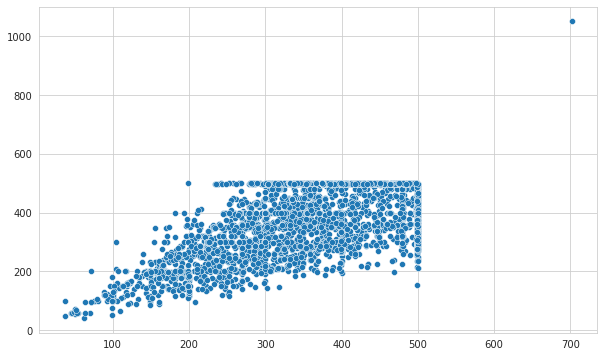

In [108]:
sns.scatterplot(x,y);

In [109]:
np.mean(x), np.median(x)

(365.0505372065261, 374.0)

In [110]:
np.mean(y), np.median(y)

(398.9930362116992, 426.0)

In [111]:
image_shape = (256,256,3)

## Scalling

**Let's check the images if they are needed to be scaled or not**

In [112]:
cats.max()

255

In [113]:
dogs.max()

255

As we see above, all images have been already scaled

## Image Data Generator

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

In [114]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [115]:
#help(ImageDataGenerator)

In [116]:
image_gen = ImageDataGenerator(rotation_range=15,        # on the air olarak image'ları dönüştürüyor.
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1/255, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest')

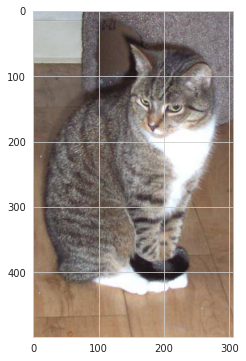

In [117]:
plt.imshow(cats);

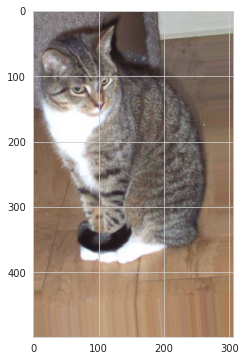

In [118]:
plt.imshow(image_gen.random_transform(cats));

### Taking the path to a directory & Generating batches of augmented data

flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

In [119]:
#help(image_gen.flow_from_directory)
#Takes the path to a directory & generates batches of augmented data.

In [120]:
image_gen.flow_from_directory(train_path)

Found 17526 images belonging to 2 classes.


In [121]:
image_gen.flow_from_directory(validation_path)

Found 2290 images belonging to 2 classes.


In [122]:
batch_size = 32

In [123]:
train_image_gen = image_gen.flow_from_directory(directory=train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                shuffle=True)

Found 17526 images belonging to 2 classes.


In [124]:
validation_image_gen = image_gen.flow_from_directory(directory=validation_path,           # Prediction yaparken sıra karışmasın diye shuffle=False oluyor.
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=False)

Found 2290 images belonging to 2 classes.


In [125]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [126]:
validation_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [127]:
train_image_gen[0]

(array([[[[0.4846698 , 0.4776393 , 0.49724713],
          [0.48929918, 0.4853776 , 0.5057749 ],
          [0.5023412 , 0.49841964, 0.52194905],
          ...,
          [0.4181719 , 0.35708997, 0.32850978],
          [0.4394393 , 0.38061577, 0.3531648 ],
          [0.4396106 , 0.38078704, 0.35333607]],
 
         [[0.48514757, 0.47892264, 0.49853048],
          [0.48235282, 0.47843125, 0.4996341 ],
          [0.4854291 , 0.48150754, 0.50503695],
          ...,
          [0.44717163, 0.38770077, 0.35992613],
          [0.43380046, 0.37497693, 0.34752595],
          [0.4420272 , 0.3832037 , 0.3557527 ]],
 
         [[0.49762917, 0.48719448, 0.5035443 ],
          [0.49712893, 0.49231416, 0.51383644],
          [0.49573523, 0.49181366, 0.51534307],
          ...,
          [0.4554504 , 0.39662683, 0.36917585],
          [0.4327487 , 0.37392518, 0.3464742 ],
          [0.4431373 , 0.38431376, 0.35686275]],
 
         ...,
 
         [[0.56033564, 0.48905277, 0.41478878],
          [0.56975

In [128]:
train_image_gen[0][0].shape

(32, 256, 256, 3)

In [129]:
train_image_gen[0][0][0].shape

(256, 256, 3)

In [130]:
len(train_image_gen), len(validation_image_gen)

(548, 72)

In [131]:
len(train_image_gen)*batch_size, len(validation_image_gen)*batch_size 

(17536, 2304)

In [132]:
# Get a sample of the training data batch 
images, labels = train_image_gen.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [133]:
# Get a sample of the testing data batch 
images, labels = validation_image_gen.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

# Modelling

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [134]:
model1 = Sequential()

model1.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))


model1.add(Flatten())


model1.add(Dense(128))
model1.add(Activation('relu'))

model1.add(Dropout(0.5))

model1.add(Dense(1))
model1.add(Activation('sigmoid'))

# optimizer = keras.optimizers.Adam(lr=0.01)
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [135]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 64)      

In [136]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [138]:
model1.fit(train_image_gen,
          epochs=20,
          steps_per_epoch=len(train_image_gen),  # Xtrain yerine yeni oluşturulmuş image setini veriyoruz. Oluşturulan yeni datanın tamamını kullanıyoruz. Overfitting varsa bu sayı azaltılabilir. Ayrıca eğitim süresi azalsın diye
          validation_data=validation_image_gen,
          validation_steps=len(validation_image_gen),   # Xtrain yerine yeni oluşturulmuş image setini veriyoruz. Oluşturulan yeni datanın tamamını kullanıyoruz. Overfitting varsa bu sayı azaltılabilir.
          callbacks=[early_stop])

Epoch 1/20
548/548 [==============================] - 296s 540ms/step - loss: 0.3588 - accuracy: 0.8467 - val_loss: 0.4043 - val_accuracy: 0.8249
Epoch 2/20
548/548 [==============================] - 296s 540ms/step - loss: 0.3409 - accuracy: 0.8564 - val_loss: 0.4886 - val_accuracy: 0.7790
Epoch 3/20
548/548 [==============================] - 296s 540ms/step - loss: 0.3323 - accuracy: 0.8589 - val_loss: 0.3963 - val_accuracy: 0.8245
Epoch 4/20
548/548 [==============================] - 297s 541ms/step - loss: 0.3310 - accuracy: 0.8593 - val_loss: 0.4440 - val_accuracy: 0.8044
Epoch 5/20
548/548 [==============================] - 297s 543ms/step - loss: 0.3191 - accuracy: 0.8648 - val_loss: 0.3886 - val_accuracy: 0.8319
Epoch 6/20
548/548 [==============================] - 296s 541ms/step - loss: 0.3092 - accuracy: 0.8698 - val_loss: 0.4268 - val_accuracy: 0.8122
Epoch 7/20
548/548 [==============================] - 297s 541ms/step - loss: 0.3044 - accuracy: 0.8724 - val_loss: 0.3986 -

In [139]:
model1.metrics_names

['loss', 'accuracy']

In [140]:
summary = pd.DataFrame(model1.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.359,0.847,0.404,0.825
1,0.341,0.856,0.489,0.779
2,0.332,0.859,0.396,0.824
3,0.331,0.859,0.444,0.804
4,0.319,0.865,0.389,0.832


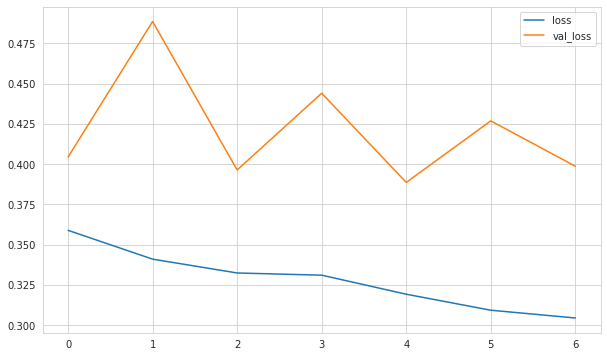

In [141]:
summary[["loss", "val_loss"]].plot();

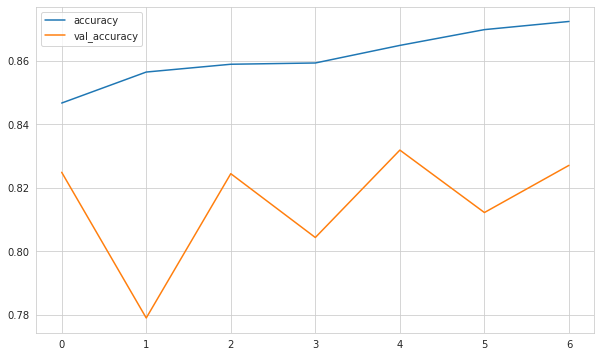

In [142]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [143]:
from sklearn.metrics import classification_report, confusion_matrix

In [144]:
score = model1.evaluate(validation_image_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

72/72 [==============================] - 33s 458ms/step - loss: 0.3949 - accuracy: 0.8297
Test loss: 0.3949350416660309
Test accuracy: 0.8296943306922913


In [145]:
pred_prob = model1.predict(validation_image_gen)

In [146]:
pred_prob

array([[6.4337131e-04],
       [3.9407703e-01],
       [2.3950312e-01],
       ...,
       [9.7929883e-01],
       [9.7129661e-01],
       [9.8669380e-01]], dtype=float32)

In [147]:
y_pred = pred_prob > 0.5

In [148]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [149]:
y_validation = validation_image_gen.classes
y_validation

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [150]:
print(classification_report(y_validation, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84      1219
           1       0.87      0.73      0.79      1071

    accuracy                           0.82      2290
   macro avg       0.83      0.82      0.82      2290
weighted avg       0.83      0.82      0.82      2290



In [151]:
confusion_matrix(y_validation, y_pred)

array([[1104,  115],
       [ 293,  778]])

In [152]:
model1.save('cat_dog.h5')

# Prediction

In [153]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [154]:
model=load_model('cat_dog.h5')

In [155]:
target_class=random.choice(class_names)
target_class

'dog'

In [156]:
random_image = random.sample(os.listdir(validation_path + target_class), 1)
random_image

['138.jpg']

In [157]:
image_path = validation_path + target_class + "/" + random_image[0]
image_path

'data/validation/dog/138.jpg'

In [158]:
my_image = image.load_img(image_path, target_size=image_shape)

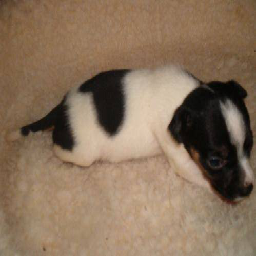

In [159]:
my_image

In [160]:
type(my_image)

PIL.Image.Image

In [161]:
#my_image = np.array(my_image)
my_image = image.img_to_array(my_image)

In [162]:
my_image.shape

(256, 256, 3)

In [163]:
my_image = np.expand_dims(my_image, axis=0)

In [164]:
my_image.shape

(1, 256, 256, 3)

In [165]:
model.predict(my_image)

array([[1.7727037e-15]], dtype=float32)

In [166]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [167]:
def pred_and_plot(model, img_size):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  target_class=random.choice(class_names)
  random_image = random.sample(os.listdir(validation_path + target_class), 1)
  img_path = validation_path + target_class + "/" + random_image[0]
  img = image.load_img(img_path, target_size=img_size)
  img = np.array(img)
  
  # Make a prediction
  pred = model.predict(np.expand_dims(img, axis=0))
  print("prediction_probability: ", pred.max())

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

prediction_probability:  1.0


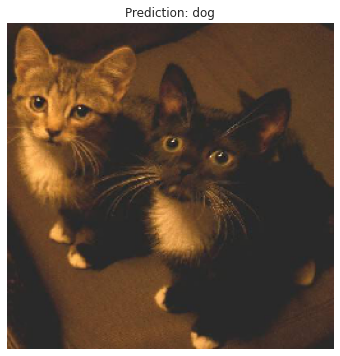

In [169]:
pred_and_plot(model, (256, 256))

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>